In [84]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import os,sys
opj = os.path.join
from tqdm import tqdm
import acd
from copy import deepcopy
from model_fashion_mnist import Net, Net2c
import dset_fashion_mnist as dset
sys.path.append('../trim')
from transforms_torch import transform_bandpass, tensor_t_augment, batch_fftshift2d, batch_ifftshift2d
from trim import *
from util import *
from captum.attr import *
import skimage.data
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
# set args
args = dset.get_args()

# load fashion-mnist dataset
train_loader, test_loader = dset.load_data(args.batch_size, args.test_batch_size, device)

In [119]:
# FFT
t = lambda x: torch.fft(torch.stack((x, torch.zeros_like(x)),dim=4), 2)
transform_i = modularize(lambda x: torch.ifft(x, 2)[...,0])
band_center = 0.7
band_width_lower = 0.0
band_width_upper = np.Inf
transformer = lambda x: transform_bandpass(x, band_center, band_width_lower, band_width_upper)

# imgs
im = iter(test_loader).next()[0][10:11]
im_f = t(im)
im_bandpass = transformer(im)

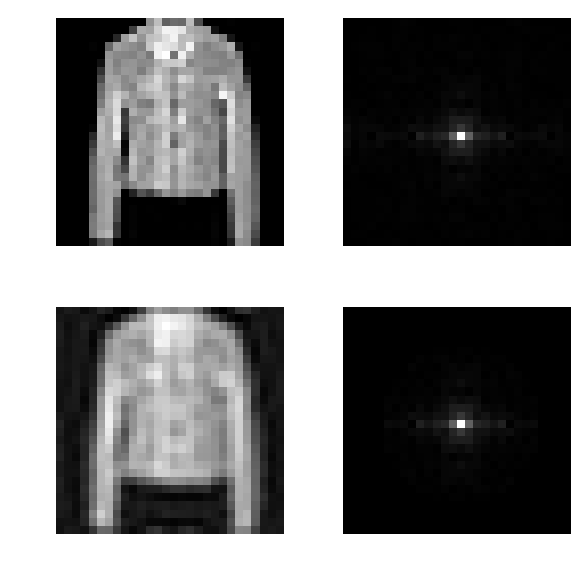

In [120]:
# viz 
plt.figure(figsize=(4,4),dpi=150)
list_of_im = [im, transformer(im)]
for i in range(2):
    im_viz = list_of_im[i]
    plt.subplot(2, 2, i*2 + 1)
    plt.imshow(im_viz.squeeze(), cmap='gray')
    plt.axis('off')
    plt.subplot(2, 2, i*2 + 2)
    plt.imshow(mag(batch_fftshift2d(t(im_viz)).squeeze()), cmap='gray')
    plt.axis('off')    
plt.tight_layout()
plt.show()